### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
    - null hypothesis - the network latency stayed the same when switching internet service providers
        no significant change in latency
    - alternative hypothesis - the network latency has gone up/down since switching internet service providers
        latency is different 
        latency is greater than
    - true positive - network latency stays the same when not switching providers
    - true negative - network latency goes up/down when switching providers
    - type 1 error - the network latency looks as though it has gone up/down when switching providers, but that is not the case. Latency has stayed the same, but we are still seeing it go up/down.
    - type 2 error - the network latency looks as though it stayed the same when switching providers, but it is actually not the case. Latency has actually gone up/down, but we are still seeing that it is the same.
    
- Is the website redesign any good? (are we optimizing for sales, service speed?)
    - null hypothesis - website redesign hasn't had changes
    - alternative hypothesis - website redesign is good/bad
    - true positive - getting good reviews on website redesign and the website redesign is actually good 
    - true negative - getting bad reviews on website redesign and the website redesign is actually bad
    - type 1 error - getting bad reviews on website redesign but website redesign is actually good
    - type 2 error - getting good reviews on website redesign but website redesign is actually bad
    
    
- Is our television ad driving more sales? 
    - null hypothesis - tv ad is not having any effect on sales
    - alternative hypothesis - tv add has a positive/negative effect on sales
    - true positive - sales are up because tv ad driving sales
    - true negative - sales are down because tv ad has a negative effect on sales
    - type 1 error - sales are up/down but tv ad has no impact
    - type 2 error - sales are the same, but tv ad has had a positive/negative impact

In [1]:
import math
import statistics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

# T-test Exercises

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

What are we comparing?

- average time (numeric continuous values) to sell for two different groups (categories)

Form a hypothesis:

- $H_0$ = There is no difference in average time to sell at two offices
- $H_a$ = There is difference in average time to sell at two offices

Significance level $\alpha$ = 0.05

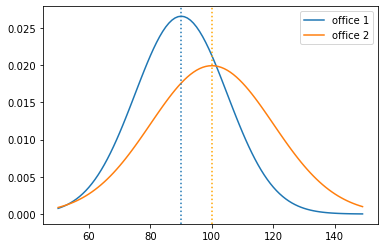

In [2]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [3]:
#this is a 2-sample t-test b/c comparing the means of 2 subgroups
#this is also 2 tailed t-test b/c checking for any difference btwn the means (regardless of direction)

In [4]:
#Setup
null_hypothesis = "average time it takes to sell homes is the same for its two offices"
alternative_hypothesis = "average time it takes to sell homes is different for its two offices"
#confidence_level = .95
#alpha = 1 - confidence_level
alpha = .05

office1 = stats.norm(90, 15).rvs(10_000)
office2 = stats.norm(100, 20).rvs(10_000)

In [5]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(office2, office1)

t, p

(40.595650486895195, 0.0)

In [6]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that average time it takes to sell homes is the same for its two offices
We accept that average time it takes to sell homes is different for its two offices


In [7]:
#solution:

#Using Scipy 
α = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

t, p = stats.ttest_ind_from_stats(100,20,50, 90,15,40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [8]:
print(f'''
Because the p-value ({p}) is less than alpha value ({alpha}),we reject the null hypothesis''')


Because the p-value (0.01020985244923939) is less than alpha value (0.05),we reject the null hypothesis


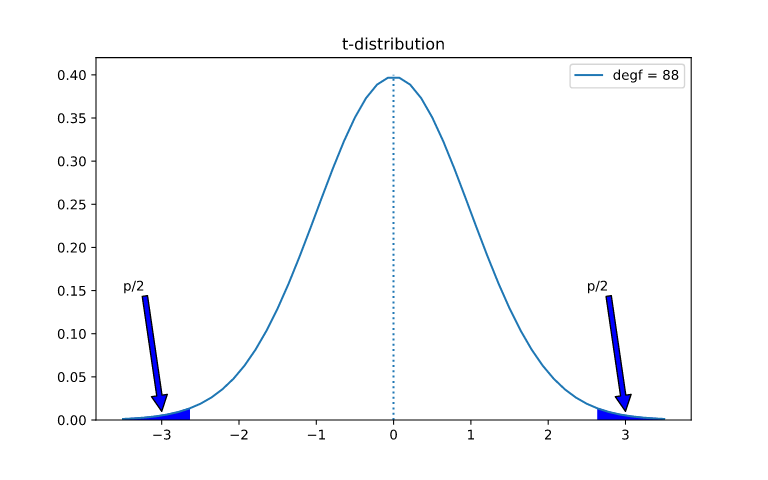

In [9]:
# Can be calculated in  python using the formula for two- 
# sample t-test

from math import sqrt

α = 0.05

# Sample means:
xbar1 = 90
xbar2 = 100

# Given sample size:
n1 = 40
n2 = 50

# given std deviations:
s1 = 15
s2 = 20


# Degrees of freedom
degf = n1 + n2 - 2

# Calculate pooled standard deviation:
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/
           (n1 + n2 - 2))

# Calculate t-statistic value
t = (xbar2 - xbar1) / (s_p * sqrt(1 / n1 + 1 / n2))

print(f't = {t:.4}')

t = 2.625


In [10]:
#Calculate p value for calculated t-statistic
p = stats.t(degf).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


### Load the mpg dataset and use it to answer the following questions:



In [11]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving

- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [12]:
mpg["avg_fuel_efficiency"] = (mpg.hwy + mpg.cty) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [13]:
#2-sample t-test b/c comparing the means of 2 subgroups
#2 tailed t-test b/c checking for any diff (regardless of direction)

#Setup
null_hypothesis = "there is no difference in fuel-efficiency in cars from 2008 vs 1999"
alternative_hypothesis = "there is a difference in fuel-efficiency in cars from 2008 vs 1999"
confidence_level = .95
alpha = 1 - confidence_level

cars99 = mpg[mpg["year"] == 1999].avg_fuel_efficiency
cars08 = mpg[mpg["year"] == 2008].avg_fuel_efficiency

In [14]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(cars99, cars08)

t, p

(0.21960177245940962, 0.8263744040323578)

In [15]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print(alternative_hypothesis)

We fail to reject the null hypothesis
there is a difference in fuel-efficiency in cars from 2008 vs 1999


In [16]:
#makes more sense to add harmonic mean 
#used for rate changes (ex: miles per gallon/per hr)
#i did arithmetic mean above, but doesn't mathematically make sense 
#b/c hwy and city miles not the same

#actual sol:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_efficiency,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,19.809524


In [17]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [18]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [19]:
fe_2008.mean(), fe_1999.mean()


(19.488662986569054, 19.68238764869729)

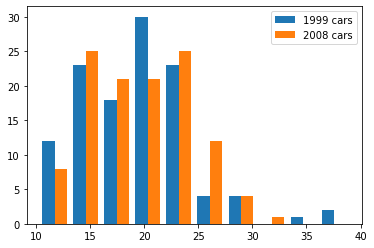

In [20]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### Are compact cars more fuel-efficient than the average car?


Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

- $H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
- $H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, **t > 0* and **p/2 < 0.05** 

In [21]:
#1-sample t-test b/c comparing the mean of a subgroup to the mean of a population
#1 tailed t-test b/c checking more fuel-efficiency

#Setup
null_hypothesis = "compact cars have the same fuel efficiency as the average car"
alternative_hypothesis = "there is a difference in fuel efficiency between compact car and the average car"
confidence_level = .95
alpha = 1 - confidence_level

average_car = mpg.avg_fuel_efficiency
compact_car = mpg[mpg["class"] == "compact"].avg_fuel_efficiency

In [22]:
#ttest_1samp function (#1 samp)
t, p = stats.ttest_1samp(compact_car, average_car.mean())
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [23]:
if (p/2) < alpha and t > 0: #(p/2) b/c 1-tailed and (t>0) checking "more than" (not less than)
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    

We reject the null hypothesis that compact cars have the same fuel efficiency as the average car
We accept the alternative hypothesis that there is a difference in fuel efficiency between compact car and the average car


In [24]:
#using harmonic mean:

fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [25]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



### Do manual cars get better gas mileage than automatic cars?

In [26]:
#2-sample t-test b/c comparing the means of 2 subgroups
#1 tailed t-test b/c checking for better gas mileage

#Setup
null_hypothesis = "there is no difference in gas mileage for manual and automatic cars"
alternative_hypothesis = "there is a difference in gas mileage for manual and automatic cars"
confidence_level = .95
alpha = 1 - confidence_level

manual = mpg[mpg.trans.str.contains("manual")].avg_fuel_efficiency
automatic = mpg[mpg.trans.str.contains("auto")].avg_fuel_efficiency

In [27]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(manual, automatic)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [28]:
if (p/2) < alpha and t > 0: ##(p/2) b/c 1-tailed and (t>0) checking "more than" (not less than)
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no difference in gas mileage for manual and automatic cars
We accept the alternative hypothesis that there is a difference in gas mileage for manual and automatic cars


In [29]:
#using harmonic mean:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [30]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [31]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

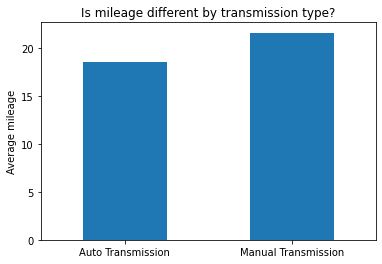

In [32]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

### Bonus: Q1. Load “Cust_Churn_Telco.csv” data. Using this data answer the following questions:
CSV file can be found here —> 
https://classroom.google.com/c/MjI5NDAwNDI2NTg5/m/MjczODkyOTkxOTM0/details


In [33]:
telco= pd.read_csv("Copy of Cust_Churn_Telco - Cust_Churn_Telco.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?


In [71]:
#1-sample t-test b/c comparing the mean of a subgroup (cust churn) to the mean of a population(all cust)
#1 tailed t-test b/c checking for better gas mileage ( (p/2) < a and t>0 )

#Setup
null_hypothesis = "there is no difference in the monthly charges for customers who churn vs all customers"
alternative_hypothesis = "customers who churn have a different monthly charge than all customers"
confidence_level = .95
a = 1 - confidence_level


In [72]:
churn_cust = telco[telco.Churn == 'Yes']

In [73]:
churn_cust.MonthlyCharges.mean(), telco.MonthlyCharges.mean()

(74.4413322632423, 64.76169246059922)

In [74]:
#.ttest_1samp function (b/c 1-sample t-test)
t, p = stats.ttest_1samp(churn_cust.MonthlyCharges, telco.MonthlyCharges.mean())
t, p

(16.965403080505645, 3.7406392993841064e-60)

In [75]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no difference in the monthly charges for customers who churn vs all customers
We accept the alternative hypothesis that customers who churn have a different monthly charge than all customers


### Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?


In [79]:
#2-sample t-test b/c comparing the mean of a subgroup (cust churn) to the mean of another subgroup(don't churn)
#1 tailed t-test b/c checking for better gas mileage ( (p/2) < a and t>0 )

#Setup
null_hypothesis = "there is no difference in the monthly charges for customers who churn vs customers who don't churn"
alternative_hypothesis = "customers who churn have a different monthly charge than customer who don't churn"
confidence_level = .95
a = 1 - confidence_level


In [80]:
churn = telco[telco.Churn == 'Yes']
no_churn = telco[telco.Churn == 'No']

In [81]:
t, p = stats.ttest_ind(churn.MonthlyCharges, no_churn.MonthlyCharges)
t, p

(16.53673801593631, 2.706645606888261e-60)

In [82]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no difference in the monthly charges for customers who churn vs customers who don't churn
We accept the alternative hypothesis that customers who churn have a different monthly charge than customer who don't churn


### Bonus: Q2. Load Iris dataset from pydataset or sns. Using this data answer the following questions:


In [83]:
import seaborn as sns
import pydataset 
from pydataset import data

In [84]:
iris = sns.load_dataset('iris')


In [85]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [92]:
iris.value_counts().head()

sepal_length  sepal_width  petal_length  petal_width  species   
5.8           2.7          5.1           1.9          virginica     2
7.9           3.8          6.4           2.0          virginica     1
5.4           3.0          4.5           1.5          versicolor    1
5.5           2.4          3.7           1.0          versicolor    1
              2.3          4.0           1.3          versicolor    1
dtype: int64

### Is the sepal length significantly different between Veriscolor and Virginica?


In [107]:
#2-sample t-test b/c comparing the means of 2 subgroups
#2 tailed t-test b/c checking for any diff (regardless of direction)

#Setup
null_hypothesis = "there is no difference in sepal length between Versicolor and Virginia"
alternative_hypothesis = "there is a difference in sepal length between Versicolor and Virginia"
confidence_level = .95
alpha = 1 - confidence_level

versicolor = iris[iris.species == "versicolor"]
virginica = iris[iris.species == "virginica"]

In [120]:
versicolor_sepal = versicolor.sepal_length
virginica_sepal = virginica.sepal_length

In [121]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(versicolor_sepal, virginica_sepal)

t, p

(-5.629165259719801, 1.7248563024547942e-07)

In [122]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print(alternative_hypothesis)

We reject the null hypothesis that there is no difference in sepal length between Versicolor and Virginia


### Is the sepal length significantly different between Setosa and Virginica?

In [123]:
#2-sample t-test b/c comparing the means of 2 subgroups
#2 tailed t-test b/c checking for any diff (regardless of direction)

#Setup
null_hypothesis = "there is no difference in sepal length between Setosa and Virginica"
alternative_hypothesis = "there is a difference in sepal length between Setosa and Virginica"
confidence_level = .95
alpha = 1 - confidence_level

setosa = iris[iris.species == "setosa"]
virginica = iris[iris.species == "virginica"]

In [124]:
setosa_sepal = setosa.sepal_length
virginica_sepal = virginica.sepal_length

In [125]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(setosa_sepal, virginica_sepal)

t, p

(-15.386195820079404, 6.892546060674059e-28)

In [126]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print(alternative_hypothesis)

We reject the null hypothesis that there is no difference in sepal length between Setosa and Virginica


# Correlation Exercises

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data

In [128]:
#in the event of NaNs/nulls:
#df = df.dropna()


#in the event of empty strings:
#df['TotalCharges'] = (df['TotalCharges'] + '0').astype(float)
#df = df[df.TotalCharges != 0]

### 1. Use the telco_churn data. 

In [129]:
telco= pd.read_csv("Copy of Cust_Churn_Telco - Cust_Churn_Telco.csv")
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [130]:
telco=telco.dropna() #drops null values

### Does tenure correlate with monthly charges? 

In [131]:
x = telco.tenure
y = telco.MonthlyCharges

r, p = stats.pearsonr(x, y)

r, p

(0.2468617666408935, 3.9898213232673846e-98)

In [132]:
#or you can also do it like this:
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

r, p

(0.2468617666408935, 3.9898213232673846e-98)

Text(0.5, 1.0, 'Does tenure correlate with monthly charges?')

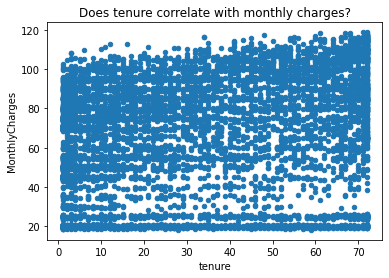

In [133]:
#visualize:
telco.plot.scatter('tenure', 'MonthlyCharges')

plt.title("Does tenure correlate with monthly charges?")


### Total charges? 

In [134]:
r, p = stats.pearsonr(telco.tenure, telco.TotalCharges)

r, p

(0.825880460933202, 0.0)

Text(0.5, 1.0, 'Does tenure correlate with total charges?')

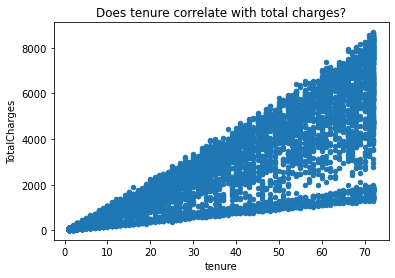

In [135]:
#visualize:
telco.plot.scatter('tenure', 'TotalCharges')

plt.title("Does tenure correlate with total charges?")

### What happens if you control for phone and internet service?

In [136]:
phone_and_internet = telco[(telco.PhoneService == "Yes") & (telco.InternetService != 'No')]
#getting customers w/ phone and internet service

In [137]:
r, p = stats.pearsonr(phone_and_internet.tenure, phone_and_internet.TotalCharges)

r, p

(0.957922977802919, 0.0)

Text(0.5, 1.0, 'Does tenure correlate with total charges if phone/internet service taken into account?')

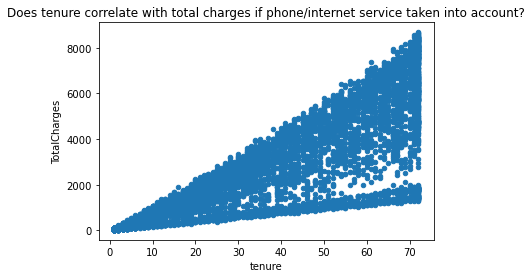

In [138]:
#visualize:
telco.plot.scatter('tenure', 'TotalCharges')

plt.title("Does tenure correlate with total charges if phone/internet service taken into account?")

### 2. Use the employees database.

In [139]:
from env import host, user, password

def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url


sql = """
select *
from employees
"""

pd.read_sql(sql, get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### Is there a relationship between how long an employee has been with the company and their salary?


In [140]:
query = """
select *
from employees
join salaries using (emp_no)
join titles using (emp_no)
where salaries.to_date > curdate();
"""

pd.read_sql(query, get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Engineer,1987-08-30,1992-08-29
371239,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01
371240,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01
371241,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Staff,1993-12-27,1998-12-27


In [141]:
employeesdb = pd.read_sql(query, get_db_url(user, host, password, 'employees'))

In [142]:
employeesdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371243 entries, 0 to 371242
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      371243 non-null  int64 
 1   birth_date  371243 non-null  object
 2   first_name  371243 non-null  object
 3   last_name   371243 non-null  object
 4   gender      371243 non-null  object
 5   hire_date   371243 non-null  object
 6   salary      371243 non-null  int64 
 7   from_date   371243 non-null  object
 8   to_date     371243 non-null  object
 9   title       371243 non-null  object
 10  from_date   371243 non-null  object
 11  to_date     371243 non-null  object
dtypes: int64(2), object(10)
memory usage: 34.0+ MB


In [143]:
employeesdb.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01


In [144]:
#get days worked since hire date
from datetime import date

employeesdb["days"] = date.today()-employeesdb.hire_date

In [145]:
employeesdb.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12651 days
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,12868 days
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12588 days
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12493 days
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12493 days


In [146]:
employeesdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371243 entries, 0 to 371242
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   emp_no      371243 non-null  int64          
 1   birth_date  371243 non-null  object         
 2   first_name  371243 non-null  object         
 3   last_name   371243 non-null  object         
 4   gender      371243 non-null  object         
 5   hire_date   371243 non-null  object         
 6   salary      371243 non-null  int64          
 7   from_date   371243 non-null  object         
 8   to_date     371243 non-null  object         
 9   title       371243 non-null  object         
 10  from_date   371243 non-null  object         
 11  to_date     371243 non-null  object         
 12  days        371243 non-null  timedelta64[ns]
dtypes: int64(2), object(10), timedelta64[ns](1)
memory usage: 36.8+ MB


In [147]:
#change dtype of days to integer
employeesdb['days'] = employeesdb['days'].dt.days.astype('int16')

In [148]:
employeesdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371243 entries, 0 to 371242
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      371243 non-null  int64 
 1   birth_date  371243 non-null  object
 2   first_name  371243 non-null  object
 3   last_name   371243 non-null  object
 4   gender      371243 non-null  object
 5   hire_date   371243 non-null  object
 6   salary      371243 non-null  int64 
 7   from_date   371243 non-null  object
 8   to_date     371243 non-null  object
 9   title       371243 non-null  object
 10  from_date   371243 non-null  object
 11  to_date     371243 non-null  object
 12  days        371243 non-null  int16 
dtypes: int16(1), int64(2), object(10)
memory usage: 34.7+ MB


In [149]:
#check correlation
x = employeesdb.days
y = employeesdb.salary

r, p = stats.pearsonr(x, y)

r, p

(0.3072819093214673, 0.0)

Text(0.5, 1.0, 'how long an employee has been with the company and their salary')

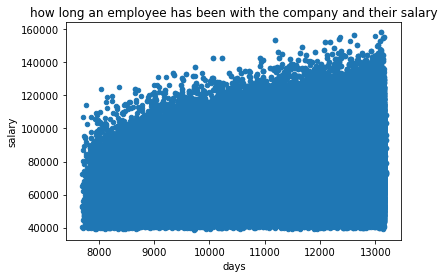

In [150]:
#visualize:
employeesdb.plot.scatter('days', 'salary')

plt.title("how long an employee has been with the company and their salary")


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [163]:
#new query to get tenure and title count:
query = """
select emp_no, 
    datediff(curdate(), hire_date) as tenure, 
    count(*) as n_titles
from employees
join titles using(emp_no)
group by emp_no
"""
df = pd.read_sql(query, get_db_url(user, host, password, 'employees'))
df.head()


,emp_no,tenure,n_titles
0,10001,12651,1
1,10002,12868,1
2,10003,12588,1
3,10004,12493,2
4,10005,11477,2


In [164]:
r, p = stats.pearsonr(df.tenure, df.n_titles)

r, p

(0.26659892991366185, 0.0)

Text(0.5, 1.0, 'tenure vs number of titles')

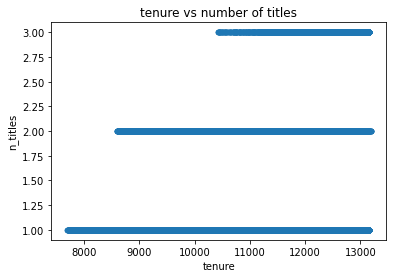

In [170]:
#visualize:
df.plot.scatter('tenure', 'n_titles')

plt.title("tenure vs number of titles")


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [176]:
data('sleepstudy', show_doc=True)


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [177]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [178]:
days = sleep.Days
reaction = sleep.Reaction

r, p = stats.pearsonr(days, reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

Text(0.5, 1.0, 'days vs reaction time')

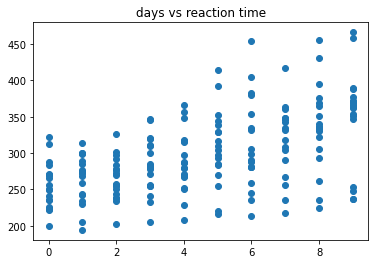

In [181]:
plt.scatter(days, reaction)

plt.title ("days vs reaction time")

# Chi Squared Exercises

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


$H_0$: there is independence between the use of a macbook and being a codeup student

$H_a$: there is a relationship

In [87]:
#make table above into a dataframe
df = pd.DataFrame([[49, 20], [1, 30]])
df.columns = ["codeup student", "not codeup student"]
df.index = ["uses a macbook", "no use of macbook"]
df

,codeup student,not codeup student
uses a macbook,49,20
no use of macbook,1,30


In [88]:
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(df)

chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [89]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [183]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


$H_0$: There is independence between the manufacturer and class

$H_a$: There is a relationship between manufacturer and class. They are dependent of each other.

In [188]:
observed = pd.crosstab(mpg.manufacturer, mpg["class"])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [189]:
alpha = .01

In [191]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(464.37214690582,
 5.267718408816259e-54,
 84,
 array([[0.38461538, 3.61538462, 3.15384615, 0.84615385, 2.53846154,
         2.69230769, 4.76923077],
        [0.40598291, 3.81623932, 3.32905983, 0.89316239, 2.67948718,
         2.84188034, 5.03418803],
        [0.79059829, 7.43162393, 6.48290598, 1.73931624, 5.21794872,
         5.53418803, 9.8034188 ],
        [0.53418803, 5.02136752, 4.38034188, 1.17521368, 3.52564103,
         3.73931624, 6.62393162],
        [0.19230769, 1.80769231, 1.57692308, 0.42307692, 1.26923077,
         1.34615385, 2.38461538],
        [0.2991453 , 2.81196581, 2.45299145, 0.65811966, 1.97435897,
         2.09401709, 3.70940171],
        [0.17094017, 1.60683761, 1.4017094 , 0.37606838, 1.12820513,
         1.1965812 , 2.11965812],
        [0.08547009, 0.8034188 , 0.7008547 , 0.18803419, 0.56410256,
         0.5982906 , 1.05982906],
        [0.06410256, 0.6025641 , 0.52564103, 0.14102564, 0.42307692,
         0.44871795, 0.79487179],
        [0.08547009, 0.803

In [192]:
if p < alpha:
    print ("We reject the null")
else:
    print("We fail to reject the null")
    
#rejecting null means manufacturer and class are NOT independent. 
#there is a relationship btwn manufacturer and class

We reject the null


### 3. Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [194]:
query = """
select gender, dept_name
from employees
join dept_emp using (emp_no)
join departments using (dept_no)
where dept_emp.to_date > now() and dept_name = "Sales" or dept_name = "Marketing";
"""

emp_db = pd.read_sql(query, get_db_url(user, host, password, 'employees'))
emp_db

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,M,Marketing
3,M,Marketing
4,F,Marketing
...,...,...
57907,F,Sales
57908,M,Sales
57909,M,Sales
57910,F,Sales


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [195]:
null_hypothesis = "Employee's gender is independent of whether they work in sales or marketing"
alternative_hypothesis = "There is a relationship between employee gender and whether they work in sales or marketing" 

confidence_level = .99
a = 1-confidence_level

In [196]:
observed = pd.crosstab(emp_db.gender, emp_db.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,8037,14999
M,12174,22702


In [197]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(0.0012057333194741913,
 0.9723000856728293,
 1,
 array([[ 8039.44944053, 14996.55055947],
        [12171.55055947, 22704.44944053]]))

In [198]:
if p < alpha:
    print ("We reject the null")
else:
    print("We fail to reject the null")
    
#failing to reject the null means employee's gender and whether they work in sales or marketing is independent 
#there is independence between employee's gender and whether they work in sales or marketing


We fail to reject the null


### Is an employee's gender independent of whether or not they are or have been a manager?

In [199]:
query = """
select gender, title
from employees
join dept_manager using (emp_no)
join titles using (emp_no)
where title = "Manager";
"""

emp_db = pd.read_sql(query, get_db_url(user, host, password, 'employees'))
emp_db

,gender,title
0,M,Manager
1,M,Manager
2,M,Manager
3,F,Manager
4,F,Manager
5,F,Manager
6,F,Manager
7,F,Manager
8,M,Manager
9,M,Manager


In [200]:
null_hypothesis = "Employee's gender is independent of whether they have been a manager or not"
alternative_hypothesis = "There is a relationship between employee gender and whether they work have been a manager or not" 

confidence_level = .99
a = 1-confidence_level

In [201]:
observed = pd.crosstab(emp_db.gender, emp_db.title)
observed

title,Manager
gender,
F,13
M,11


In [202]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(0.0,
 1.0,
 0,
 array([[13.],
        [11.]]))

In [203]:
if p < alpha:
    print ("We reject the null")
else:
    print("We fail to reject the null")
    
#failing to reject the null means employee's gender and whether or not they've been manager is independent 
#there is independence between employee's gender and whether or not they've been manager

We fail to reject the null
